In [1]:
import numpy as np
import cv2

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\bryan\\Documents\\Segmentation\\mmsegmentation'

In [4]:
# model config file
config_file = 'configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py'

# Model checkpoint weight file
checkpoint_file = 'https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'

In [5]:
model = init_model(config_file, checkpoint_file, device='cuda:0')

C:\Users\bryan\Documents\Segmentation\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
C:\Users\bryan\Documents\Segmentation\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth


In [6]:
img_path = 'data/street_uk.jpeg'
img_bgr = cv2.imread(img_path)
img_bgr.shape

(1500, 2250, 3)

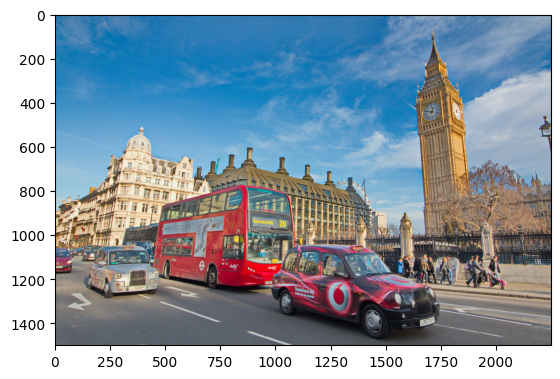

In [15]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [16]:
result = inference_model(model, img_bgr)

In [17]:
result

<SegDataSample(

    META INFORMATION
    scale_factor: (0.6826666666666666, 0.6826666666666666)
    ori_shape: (1500, 2250)
    img_shape: (1024, 1536)
    img_path: None

    DATA FIELDS
    seg_logits: <PixelData(
        
            META INFORMATION
        
            DATA FIELDS
            data: tensor([[[-11.2008, -11.2008, -11.2431,  ...,  -4.9563,  -4.9565,  -4.9565],
                         [-11.2008, -11.2008, -11.2431,  ...,  -4.9563,  -4.9565,  -4.9565],
                         [-11.2222, -11.2222, -11.2640,  ...,  -4.9669,  -4.9674,  -4.9674],
                         ...,
                         [  7.8018,   7.8018,   7.8120,  ...,   7.1611,   7.1251,   7.1251],
                         [  7.7762,   7.7762,   7.7864,  ...,   7.1381,   7.1022,   7.1022],
                         [  7.7762,   7.7762,   7.7864,  ...,   7.1381,   7.1022,   7.1022]],
                
                        [[-15.1328, -15.1328, -15.1889,  ..., -12.0528, -12.0433, -12.0433],
           

In [18]:
result.keys()

['seg_logits', 'pred_sem_seg']

In [19]:
result.pred_sem_seg.data.shape

torch.Size([1, 1500, 2250])

In [20]:
np.unique(result.pred_sem_seg.data.cpu())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 13, 15], dtype=int64)

In [21]:
result.pred_sem_seg.data

tensor([[[10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]]], device='cuda:0')

In [22]:
pred_mask = result.pred_sem_seg.data[0].detach().cpu().numpy()

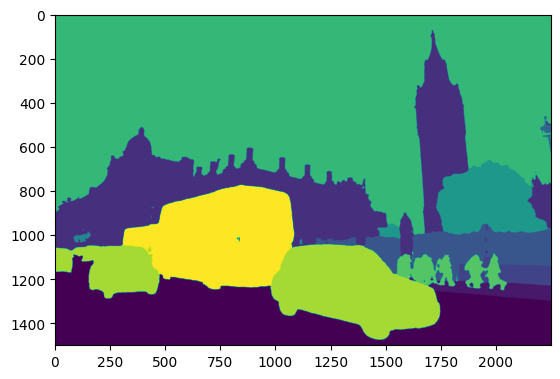

In [23]:
plt.imshow(pred_mask)
plt.show()

In [24]:
result.seg_logits.data.shape

torch.Size([19, 1500, 2250])

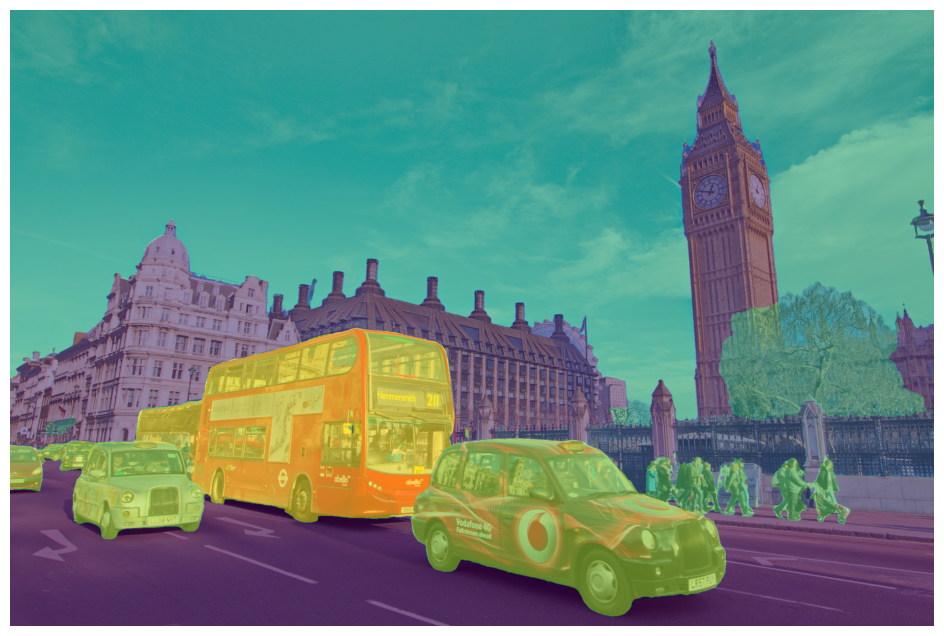

In [25]:
plt.figure(figsize=(14, 8))
plt.imshow(img_bgr[:,:,::-1])
plt.imshow(pred_mask, alpha=0.55) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.savefig('outputs/B2-1.jpg')
plt.show()

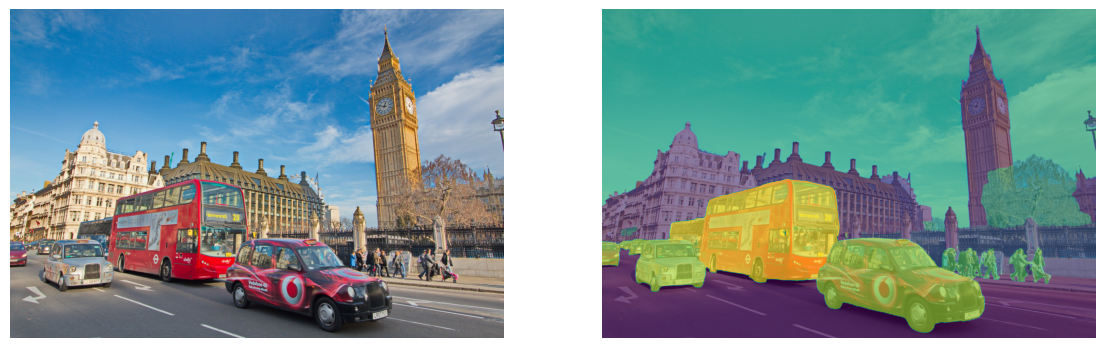

In [26]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1)
plt.imshow(img_bgr[:,:,::-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_bgr[:,:,::-1])
plt.imshow(pred_mask, alpha=0.6) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.savefig('outputs/B2-2.jpg')
plt.show()

In [27]:
from mmseg.apis import show_result_pyplot

In [29]:
img_viz = show_result_pyplot(model, img_path, result, opacity=0.8, title='MMSeg', out_file='outputs/B2-3.jpg', save_dir="data")

In [30]:
img_viz.shape

(1500, 2250, 3)

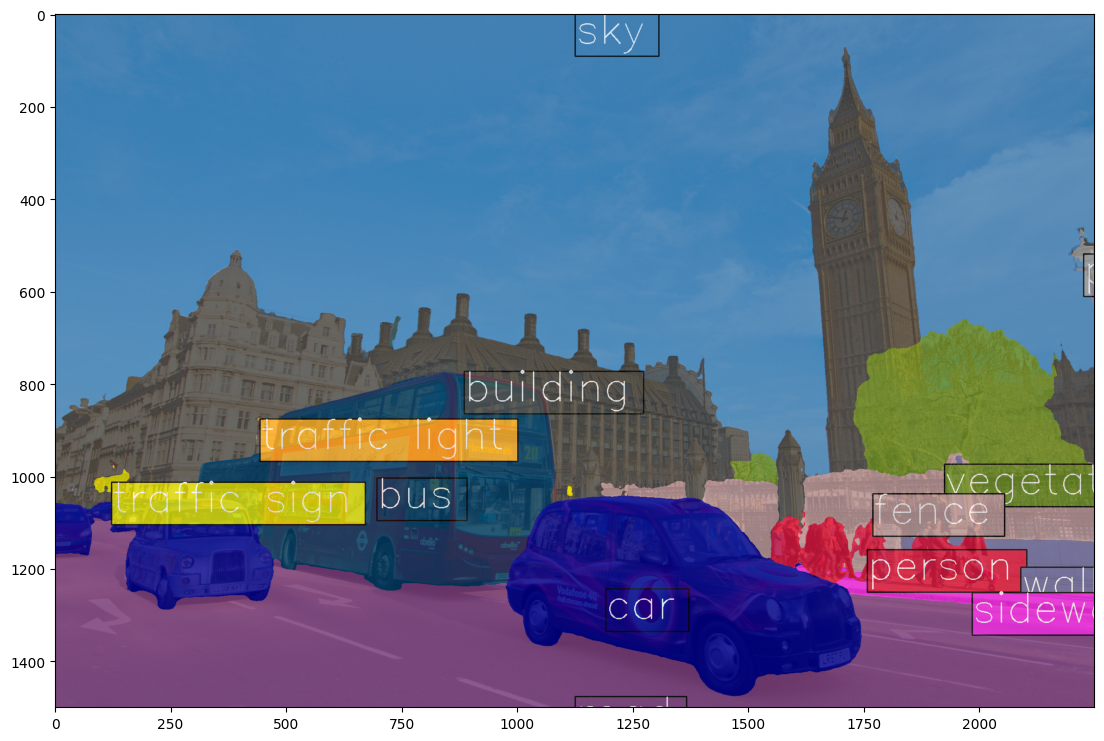

In [32]:
plt.figure(figsize=(16, 9))
plt.imshow(img_viz)
plt.show()

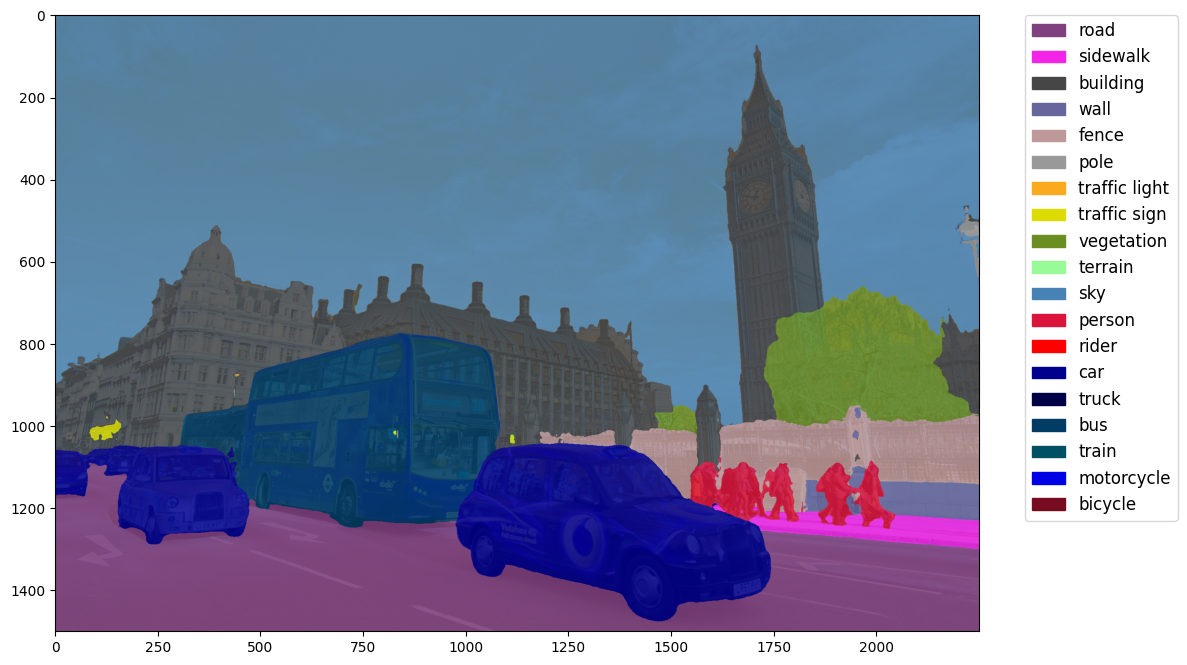

In [33]:
from mmseg.datasets import cityscapes
import numpy as np
import mmcv 
from PIL import Image

# 获取类别名和调色板
classes = cityscapes.CityscapesDataset.METAINFO['classes']
palette = cityscapes.CityscapesDataset.METAINFO['palette']
opacity = 0.15 # 透明度，越大越接近原图

# 将分割图按调色板染色
# seg_map = result[0].astype('uint8')
seg_map = pred_mask.astype('uint8')
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(14, 8))
im = plt.imshow(((np.array(seg_img.convert('RGB')))*(1-opacity) + mmcv.imread(img_path)*opacity) / 255)

# 为每一种颜色创建一个图例
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.savefig('outputs/B2-4.jpg')
plt.show()